In [81]:
import re
import requests
from bs4 import BeautifulSoup


### 01.  URL Link
*https://finance.naver.com/news/news_list.naver*
> target 페이지를 통해 element 구조를 확인

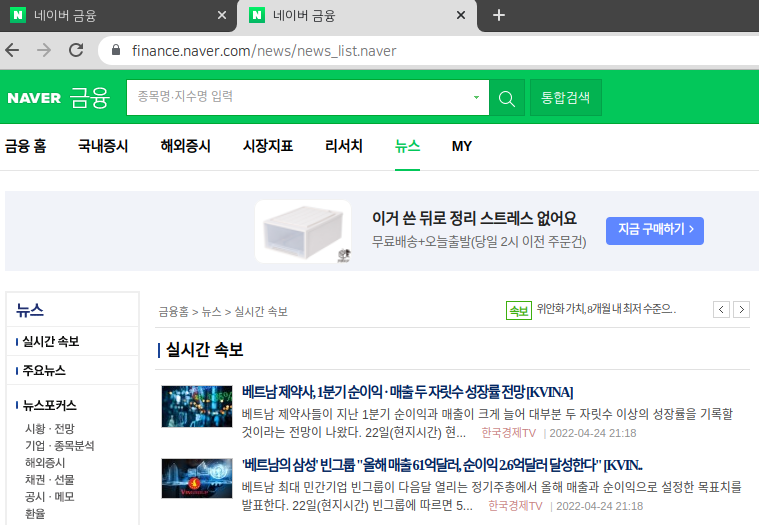

In [3]:
# https://finance.naver.com/news/news_list.naver?date=20220418

### 02. 크롬 개발자 모드 - elments tab
> 원하는 html element 의 구조와 link 된 구조를 확인

> selector 를 손쉽게 copy 가능

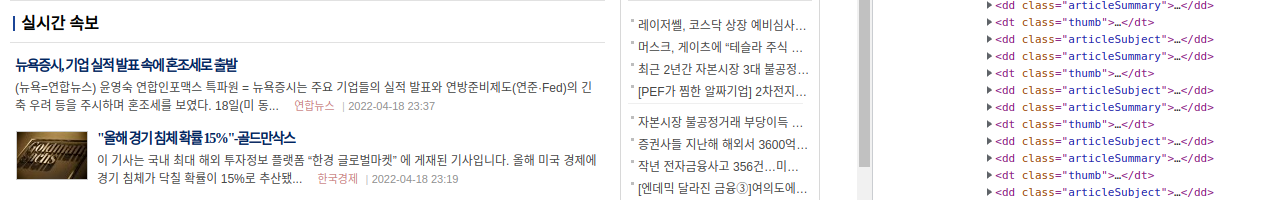

console mode

```
$$('#contentarea_left > ul.realtimeNewsList .articleSubject > a')

copy( $$('#contentarea_left > ul.realtimeNewsList .articleSubject > a') )

copy( $$('#contentarea_left > ul.realtimeNewsList .articleSubject > a').map(el=>{return el.href;}))

```

### 03. Get Method (using python requests.get )


- python 을 통한 parsing 테스트 진행

In [ ]:
response = requests.get('https://finance.naver.com/news/news_list.naver?date=20220418')

- beautifulsoup parser 사용 (requirement : pip3 install lxml)

In [10]:
soup = BeautifulSoup(response.text, 'lxml')

- max page 파싱

In [84]:
max_page = soup.select_one('td.pgRR > a')
max_page_href = max_page.attrs['href']
params = {k:v for k,v in re.findall('(\w+)=(\w+)',max_page_href)}
print(params)

{'date': '20220418', 'page': '43'}


- title / 기사 link 파싱

In [80]:
for el in soup.select('#contentarea_left > ul.realtimeNewsList .articleSubject > a'):
    print(f"{el.attrs['title']}\n{el.attrs['href']}")

뉴욕증시, 기업 실적 발표 속에 혼조세로 출발
/news/news_read.naver?article_id=0013121737&office_id=001&mode=LSS2D&type=0&section_id=101&section_id2=258&section_id3=&date=20220418&page=1
"올해 경기 침체 확률 15%"-골드만삭스
/news/news_read.naver?article_id=0004687484&office_id=015&mode=LSS2D&type=0&section_id=101&section_id2=258&section_id3=&date=20220418&page=1
모간스탠리, 시리우스XM '비중축소'로 하향…목표가 7달러
/news/news_read.naver?article_id=0001026399&office_id=215&mode=LSS2D&type=0&section_id=101&section_id2=258&section_id3=&date=20220418&page=1
미 10년물 국채금리 3년래 최고···기술주에 부담 [뉴욕증시 나우]
/news/news_read.naver?article_id=0001026398&office_id=215&mode=LSS2D&type=0&section_id=101&section_id2=258&section_id3=&date=20220418&page=1
웰스파고, 바이오젠 ‘비중확대’로 상향…목표가 265달러
/news/news_read.naver?article_id=0001026397&office_id=215&mode=LSS2D&type=0&section_id=101&section_id2=258&section_id3=&date=20220418&page=1
BMO, 웬디스 투자등급 하향…소비자구매력 악화 전망
/news/news_read.naver?article_id=0001026392&office_id=215&mode=LSS2D&type=0&section_id=101&section_id2=258&sect

### 04. 기사 본문 파싱

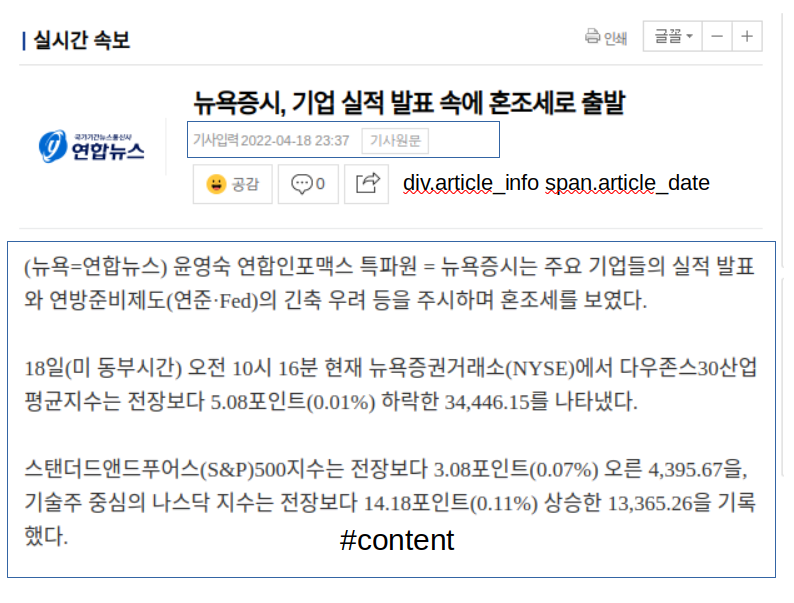

In [68]:
base_url = 'https://finance.naver.com/'

for el in soup.select('#contentarea_left > ul.realtimeNewsList .articleSubject > a'):
    print(f"{el.attrs['title']}")
    
    article_reponse = requests.get(f"{base_url}{el.attrs['href']}")
    
    article_soup = BeautifulSoup(article_reponse.text, 'lxml')
    content = article_soup.select_one('#content')
    article_date = article_soup.select_one('div.article_info span.article_date')
    
    print(article_date.text)
    print(content.text.strip())
    
    break

뉴욕증시, 기업 실적 발표 속에 혼조세로 출발
2022-04-18 23:37
(뉴욕=연합뉴스) 윤영숙 연합인포맥스 특파원 = 뉴욕증시는 주요 기업들의 실적 발표와 연방준비제도(연준·Fed)의 긴축 우려 등을 주시하며 혼조세를 보였다.     18일(미 동부시간) 오전 10시 16분 현재 뉴욕증권거래소(NYSE)에서 다우존스30산업평균지수는 전장보다 5.08포인트(0.01%) 하락한 34,446.15를 나타냈다.    스탠더드앤드푸어스(S&P)500지수는 전장보다 3.08포인트(0.07%) 오른 4,395.67을, 기술주 중심의 나스닥 지수는 전장보다 14.18포인트(0.11%) 상승한 13,365.26을 기록했다.    투자자들은 기업들의 실적과 연준의 긴축 우려를 소화하고 있다.     팩트셋에 따르면 지금까지 실적을 발표한 기업의 81.5%가 예상치를 웃도는 주당 순이익을 발표했다.     지금까지 실적을 발표한 기업은 전체의 7.5%이다. 애널리스트들은 S&P500지수 상장 기업의 1분기 주당 순이익은 지난해 같은 기간보다 5.3% 증가했을 것으로 추정하고 있다.     이번 주에는 넷플릭스와 테슬라 등 기술 기업들의 실적을 가늠할 주요 기업의 실적이 나온다.     이외에도 아메리칸항공, 유나이티드항공 등 항공업체들의 실적과 다우존스에 편입된 IBM, 존슨앤드존슨, 프록터앤드갬블(P&G) 등의 실적도 나올 예정이다.     이날 개장에 앞서 발표된 뱅크오브아메리카(BofA)의 1분기 주당 순이익은 전년 대비 12%가량 감소한 0.80달러로 집계됐다. 이는 시장의 예상치인 0.75달러를 소폭 웃돌아 주가는 2% 이상 올랐다.     지난주 실적을 발표한 JP모건과 웰스파고의 주가도 각각 1% 가까이 상승했다.    뱅크오브뉴욕멜론의 1분기 주당 순이익은 86센트로 애널리스트 예상치인 85센트를 소폭 웃돌았으나 영업수익이 예상에 소폭 못 미치면서 주가는 3% 이상 하락했다.     지난주 존 윌리엄스 뉴욕 연방준비은행(연은) 총재가 5월 기준금리 50bp 


####  왜 갑자기 이런 내용이 나올까요?

```
   ysyoon@yna.co.kr연합뉴스 관련뉴스해당 언론사에서 선정하며 언론사 페이지(아웃링크)로 이동해 볼 수 있습니다. "양현석, '너 죽이는 건 일도 아니다'라며 진술번복 요구" "러, 부차에 '강철 비' 공격도…수천개 못박힌 듯" 젖먹이 손녀가 약물중독사…'뉴욕 3부작' 작가 폴 오스터의 비극 김건희 여사, 세월호 8주기 다음날 노란 스카프 매고 산책 전용기 "한덕수·박보균, 일왕 생일파티 참석…환장 조합"
```

#### Crawaling 안에 숨겨진 실제 html element

In [69]:
content

<div class="articleCont" id="content">
							 (뉴욕=연합뉴스) 윤영숙 연합인포맥스 특파원 = 뉴욕증시는 주요 기업들의 실적 발표와 연방준비제도(연준·Fed)의 긴축 우려 등을 주시하며 혼조세를 보였다. <br/><br/>    18일(미 동부시간) 오전 10시 16분 현재 뉴욕증권거래소(NYSE)에서 다우존스30산업평균지수는 전장보다 5.08포인트(0.01%) 하락한 34,446.15를 나타냈다.<br/><br/>    스탠더드앤드푸어스(S&amp;P)500지수는 전장보다 3.08포인트(0.07%) 오른 4,395.67을, 기술주 중심의 나스닥 지수는 전장보다 14.18포인트(0.11%) 상승한 13,365.26을 기록했다.<br/><br/>    투자자들은 기업들의 실적과 연준의 긴축 우려를 소화하고 있다. <br/><br/>    팩트셋에 따르면 지금까지 실적을 발표한 기업의 81.5%가 예상치를 웃도는 주당 순이익을 발표했다. <br/><br/>    지금까지 실적을 발표한 기업은 전체의 7.5%이다. 애널리스트들은 S&amp;P500지수 상장 기업의 1분기 주당 순이익은 지난해 같은 기간보다 5.3% 증가했을 것으로 추정하고 있다. <br/><br/>    이번 주에는 넷플릭스와 테슬라 등 기술 기업들의 실적을 가늠할 주요 기업의 실적이 나온다. <br/><br/>    이외에도 아메리칸항공, 유나이티드항공 등 항공업체들의 실적과 다우존스에 편입된 IBM, 존슨앤드존슨, 프록터앤드갬블(P&amp;G) 등의 실적도 나올 예정이다. <br/><br/>    이날 개장에 앞서 발표된 뱅크오브아메리카(BofA)의 1분기 주당 순이익은 전년 대비 12%가량 감소한 0.80달러로 집계됐다. 이는 시장의 예상치인 0.75달러를 소폭 웃돌아 주가는 2% 이상 올랐다. <br/><br/>    지난주 실적을 발표한 JP모건과 웰스파고의 주가도 각각 1% 가까이 상승했다.<br/><br/>    뱅크오브뉴욕멜론의 1분기 주당 순이익

###  05. 대안은 Selenium 으로 변경 (실제 크롬 브라우저를 통한 크롤링)
---
    - 타이틀과 기사 링크 url 은 빠르게 파싱
    - 기사 링크는 selenium 을 통해서 정확하게 파싱